In [134]:
import sys
import pandas as pd
import sklearn
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [135]:
# import the dataset
file = 'Autism-Child-Data.txt'

# read the csv
data = pd.read_table(file, sep = ',', index_col = None)

In [136]:
data.replace('?', np.nan, inplace=True)

In [137]:
data = data.drop(columns=['contry_of_res', 'used_app_before','age_desc', 'relation'])

In [138]:
data['ethnicity'].value_counts()

ethnicity
White-European       108
Asian                 46
'Middle Eastern '     27
'South Asian'         21
Others                14
Black                 14
Latino                 8
Hispanic               7
Pasifika               2
Turkish                2
Name: count, dtype: int64

In [139]:
categorical = ['gender','result','ethnicity','jundice','austim']
label = LabelEncoder()


In [140]:
for i in categorical:
    data[i] = label.fit_transform(data[i])

In [141]:
X = data.drop(columns=['Class'])


In [142]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result,Class
0,1,1,0,0,1,1,0,1,0,0,6,1,6,0,0,5,NO
1,1,1,0,0,1,1,0,1,0,0,6,1,0,0,0,5,NO
2,1,1,0,0,0,1,1,1,0,0,6,1,10,0,0,5,NO
3,0,1,0,0,1,1,0,0,0,1,5,0,10,1,0,4,NO
4,1,1,1,1,1,1,1,1,1,1,5,1,6,1,0,10,YES


In [143]:
data['Class'] = label.fit_transform(data['Class'])

In [144]:
data['ethnicity'].nunique()


11

In [145]:
Y = data['Class']

In [146]:
from sklearn import model_selection
# split the X and Y data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [147]:
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_imputed = imputer.fit_transform(X)

In [148]:
X_imputed.shape

(292, 16)

In [149]:
Y.shape

(292,)

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=5, random_state=1),
    "SVM": SVC(kernel='linear', C=1.0, gamma=2),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "AdaBoost": AdaBoostClassifier(random_state=0)
}

# Define a custom scoring function for fbeta_score
scoring = make_scorer(fbeta_score, beta=0.5)

# Create an empty list to store pipelines
pipelines = []

# Iterate through each classifier
for name, classifier in classifiers.items():
    print(f"Evaluating {name}")
    
    # Cross-validation with fbeta_score
    cv_scores_fbeta = cross_val_score(classifier, X_imputed, Y, cv=10, scoring=scoring)
    print(f"Cross-validated Fbeta Score: {np.mean(cv_scores_fbeta)}")
    
    # Cross-validation with ROC AUC score
    cv_scores_roc_auc = cross_val_score(classifier, X_imputed, Y, cv=10, scoring='roc_auc')
    print(f"Cross-validated ROC AUC Score: {np.mean(cv_scores_roc_auc)}")
    
    # Create a pipeline with the classifier and fit it
    classifier_clone = clone(classifier)
    pipeline = Pipeline([
        ('classifier', classifier_clone)
    ])
    pipeline.fit(X_imputed, Y)
    pipelines.append((name, pipeline))
    
    # Make predictions on the test data using the pipeline
    predictions_test = pipeline.predict(X_test_imputed)
    
    # Evaluate the predictions using fbeta_score
    fbeta = fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)
    
    print(f"Fbeta Score on Test Set: {fbeta}")
    
    confusion = metrics.confusion_matrix(Y_test, predictions_test)
    print(confusion)
    print("===")
    

Evaluating Decision Tree
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===
Evaluating Random Forest
Cross-validated Fbeta Score: 0.9984848484848484
Cross-validated ROC AUC Score: 0.9992857142857143
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===
Evaluating SVM
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===
Evaluating KNN
Cross-validated Fbeta Score: 0.9771953271953272
Cross-validated ROC AUC Score: 0.9969047619047618
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===
Evaluating Logistic Regression
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===
Evaluating Linear Discriminant Analysis
Cross-validated Fbeta Score: 0.9664945632687567
Cross-validated ROC AUC Score: 0.997172619047619
Fbeta Score on Test Set: 0.9731543624161073
[[29  1]
 [ 0 29]]
===
Evaluating Quadratic Disc

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  war

Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===
Evaluating AdaBoost
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===


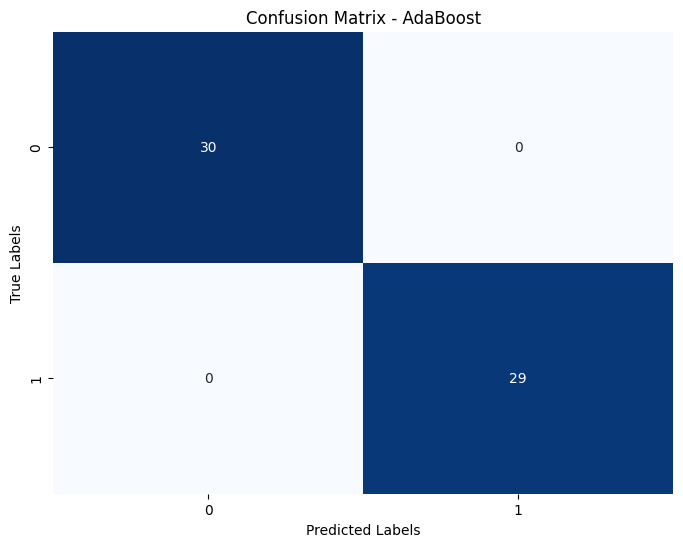

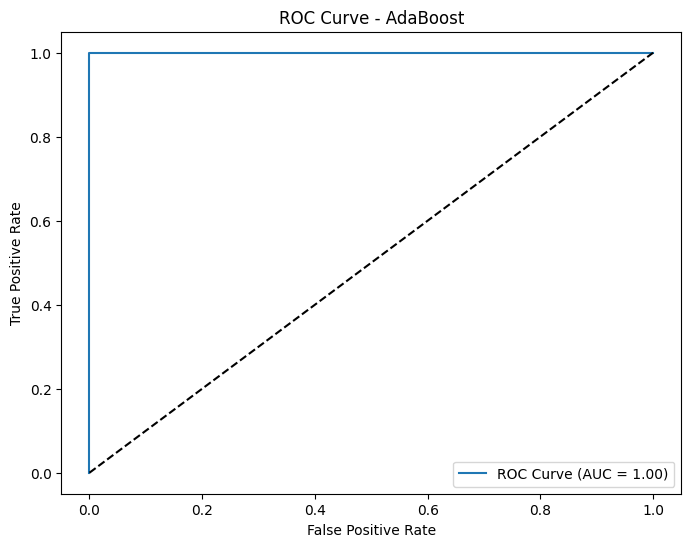

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Get decision function scores
decision_scores = pipeline.decision_function(X_test_imputed)

# Calculate ROC curve
fpr, tpr, _ = metrics.roc_curve(Y_test, decision_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {np.mean(cv_scores_roc_auc):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {name}')
plt.legend(loc='lower right')
plt.show()

Evaluating Decision Tree
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===


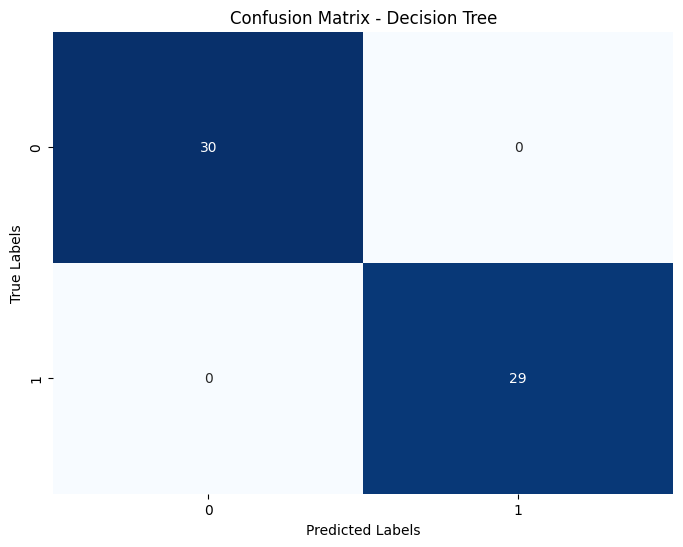

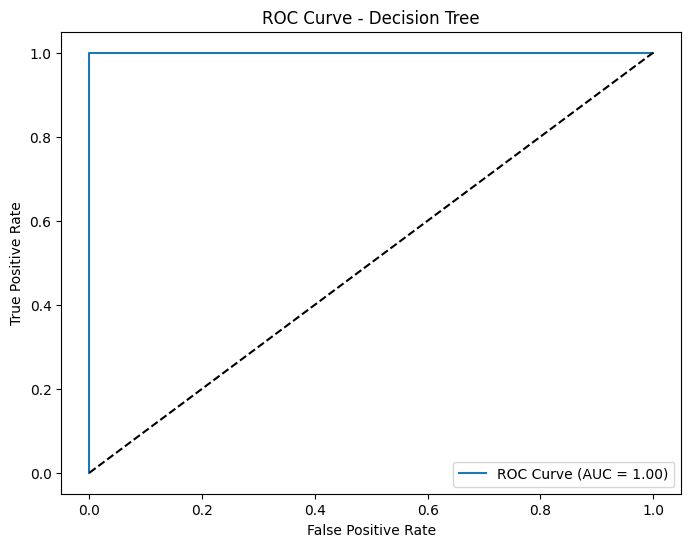

Evaluating Random Forest
Cross-validated Fbeta Score: 0.9984848484848484
Cross-validated ROC AUC Score: 0.9992857142857143
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===


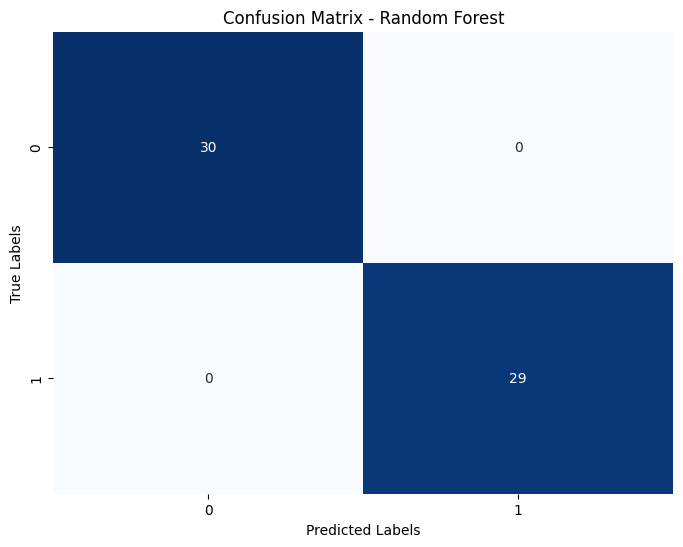

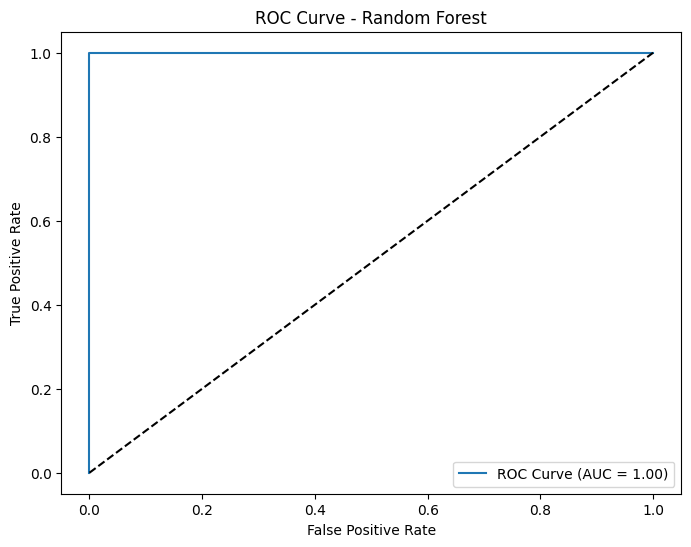

Evaluating SVM
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===


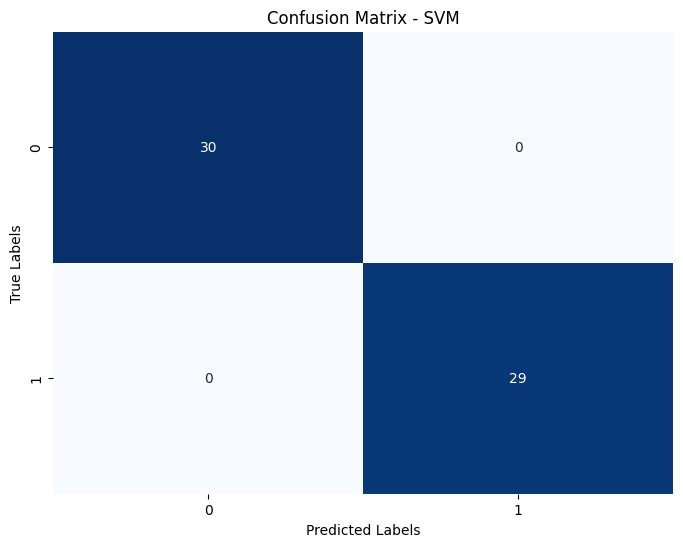

SVM classifier does not support probability estimation, skipping ROC curve plot.


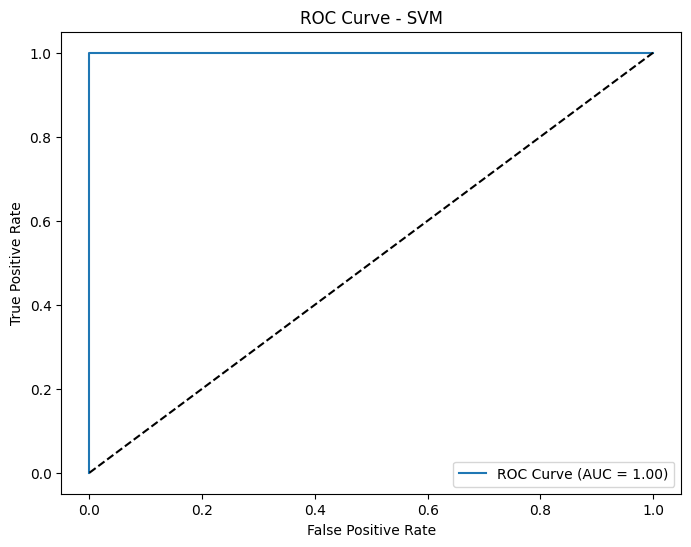

Evaluating KNN
Cross-validated Fbeta Score: 0.9771953271953272
Cross-validated ROC AUC Score: 0.9969047619047618
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===


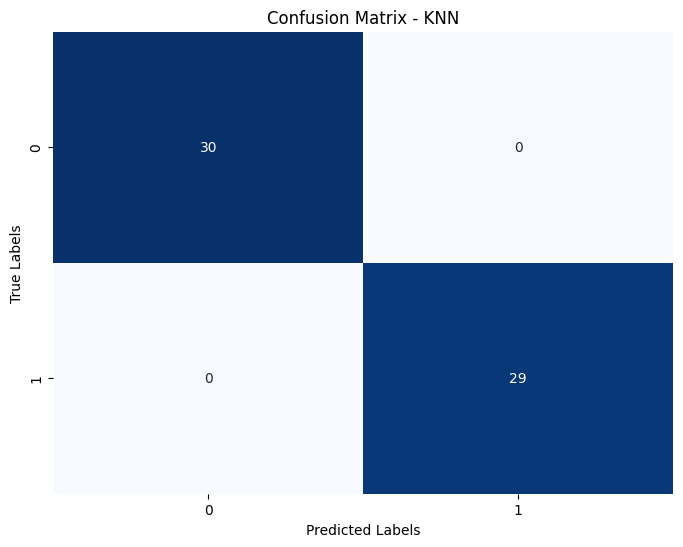

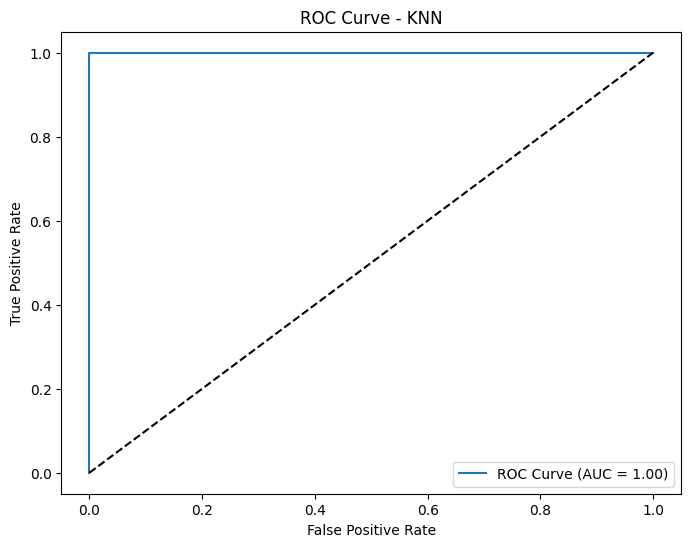

Evaluating Logistic Regression
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===


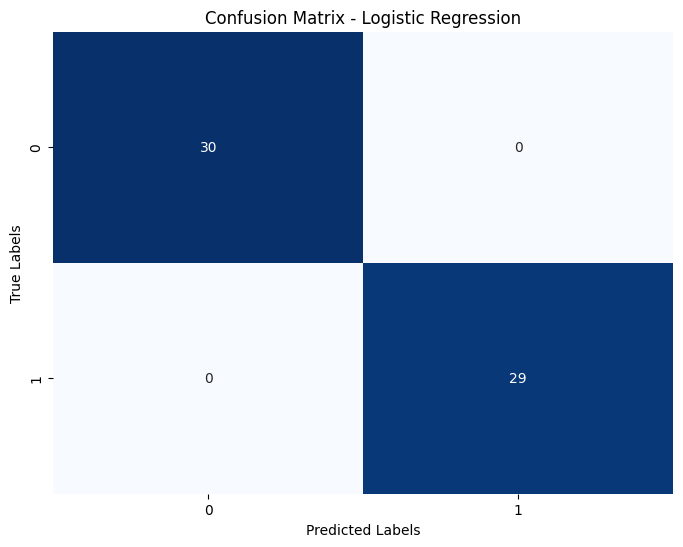

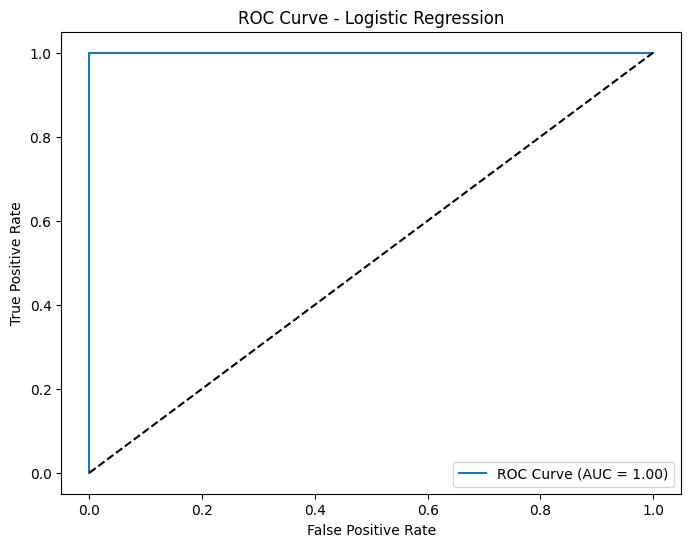

Evaluating Linear Discriminant Analysis
Cross-validated Fbeta Score: 0.9664945632687567
Cross-validated ROC AUC Score: 0.997172619047619
Fbeta Score on Test Set: 0.9731543624161073
[[29  1]
 [ 0 29]]
===


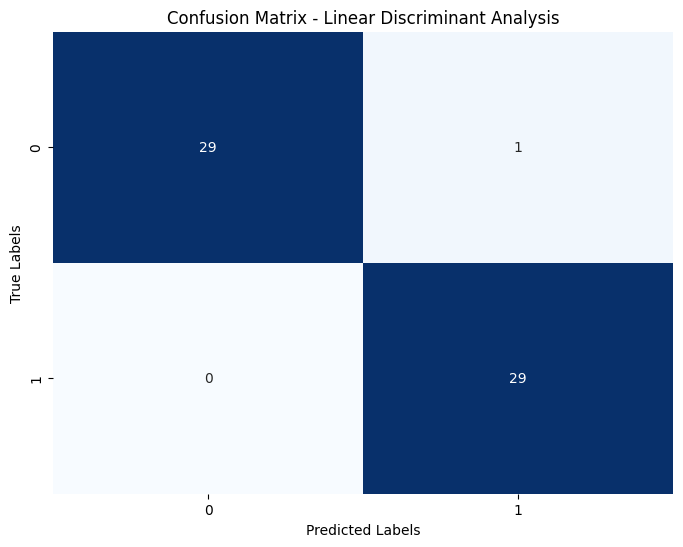

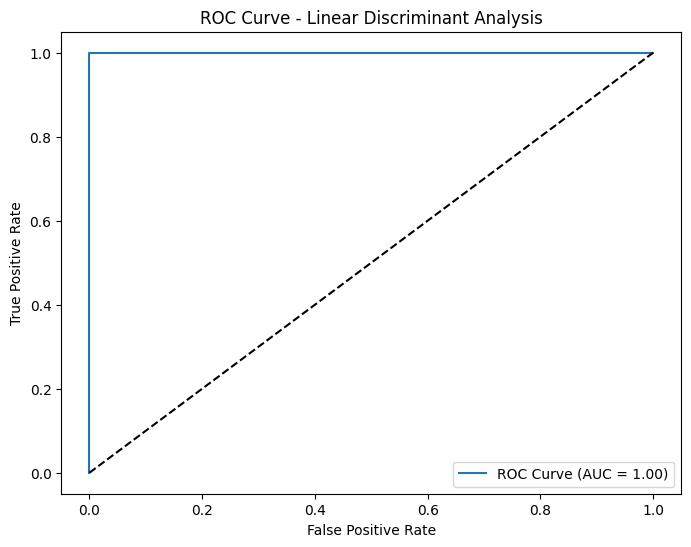

Evaluating Quadratic Discriminant Analysis
Cross-validated Fbeta Score: 0.8005826326100622
Cross-validated ROC AUC Score: 0.8727817460317461
Fbeta Score on Test Set: 0.7734806629834253
[[20 10]
 [ 1 28]]
===


c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  war

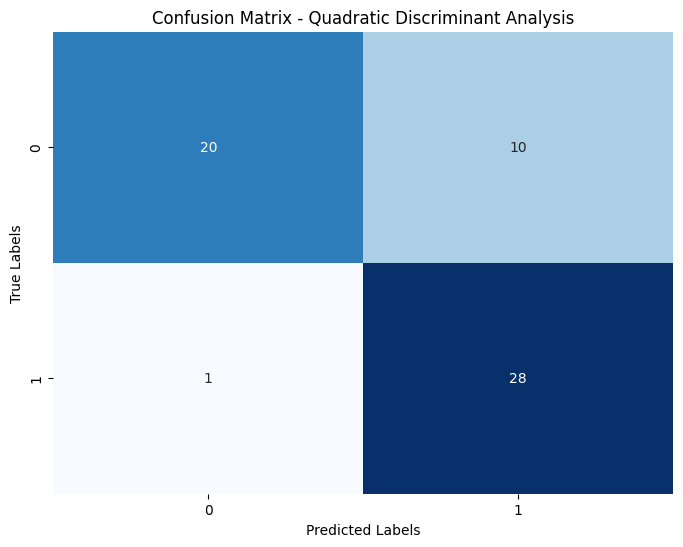

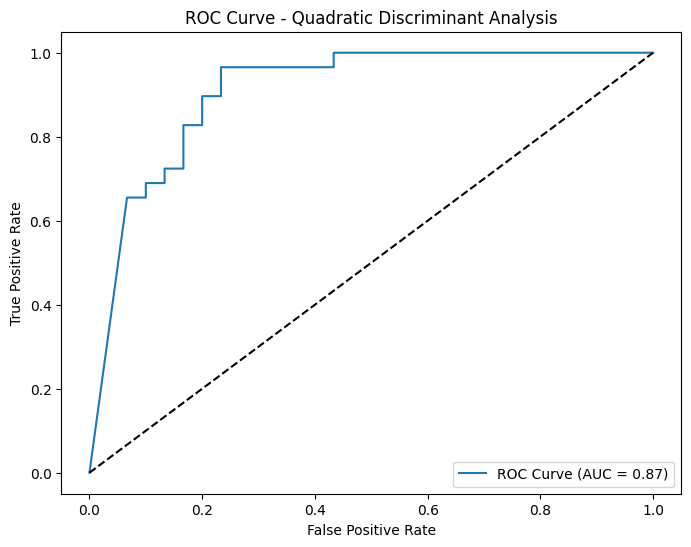

Evaluating Gradient Boosting
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===


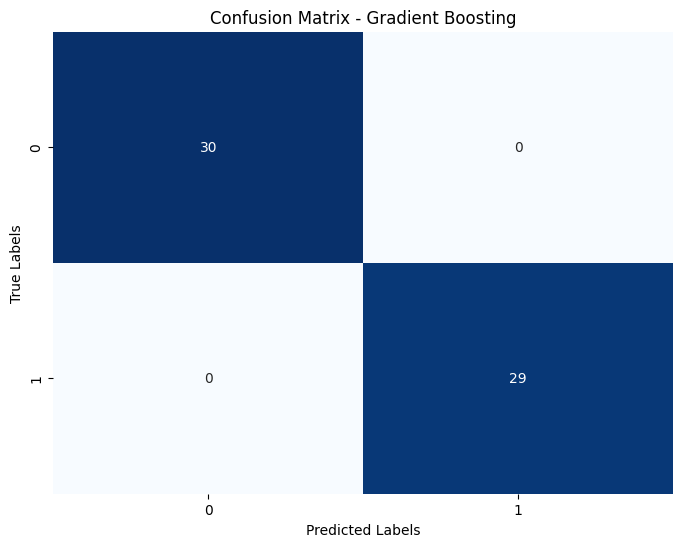

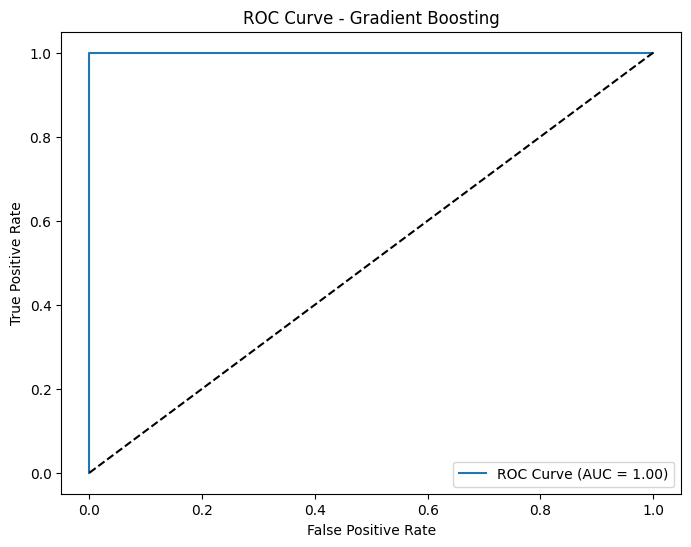

Evaluating AdaBoost
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[30  0]
 [ 0 29]]
===


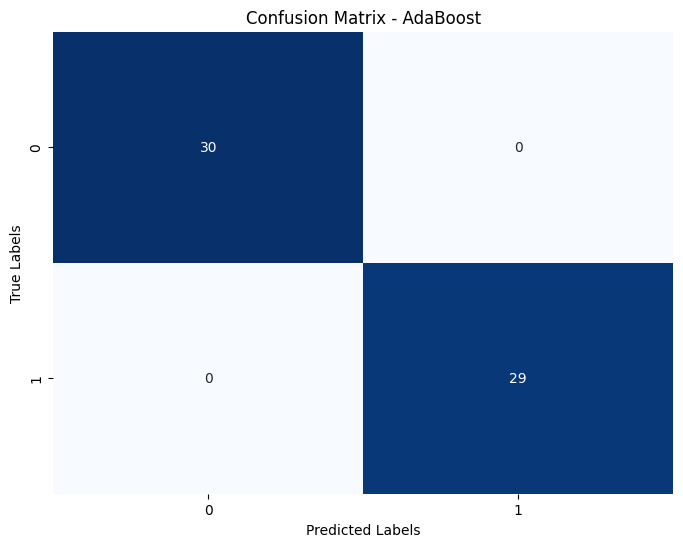

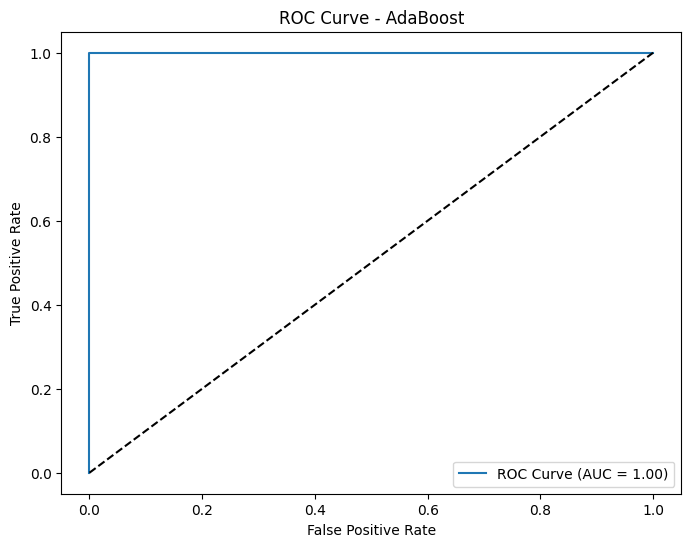

In [152]:
for name, classifier in classifiers.items():
    print(f"Evaluating {name}")
    
    # Cross-validation with fbeta_score
    cv_scores_fbeta = cross_val_score(classifier, X_imputed, Y, cv=10, scoring=scoring)
    print(f"Cross-validated Fbeta Score: {np.mean(cv_scores_fbeta)}")
    
    # Cross-validation with ROC AUC score
    cv_scores_roc_auc = cross_val_score(classifier, X_imputed, Y, cv=10, scoring='roc_auc')
    print(f"Cross-validated ROC AUC Score: {np.mean(cv_scores_roc_auc)}")
    
    # Create a pipeline with the classifier and fit it
    classifier_clone = clone(classifier)
    pipeline = Pipeline([
        ('classifier', classifier_clone)
    ])
    pipeline.fit(X_imputed, Y)
    pipelines.append((name, pipeline))
    
    # Make predictions on the test data using the pipeline
    predictions_test = pipeline.predict(X_test_imputed)
    
    # Evaluate the predictions using fbeta_score
    fbeta = fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)
    
    print(f"Fbeta Score on Test Set: {fbeta}")
    
    confusion = metrics.confusion_matrix(Y_test, predictions_test)
    print(confusion)
    print("===")
    
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    # Plot ROC curve if classifier supports probability estimation
    if hasattr(classifier, 'predict_proba'):
        fpr, tpr, _ = metrics.roc_curve(Y_test, pipeline.predict_proba(X_test_imputed)[:, 1])
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {np.mean(cv_scores_roc_auc):.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print(f"{name} classifier does not support probability estimation, skipping ROC curve plot.")
        # Get decision function scores
        decision_scores = pipeline.decision_function(X_test_imputed)

        # Calculate ROC curve
        fpr, tpr, _ = metrics.roc_curve(Y_test, decision_scores)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {np.mean(cv_scores_roc_auc):.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()


In [153]:
import joblib


In [154]:
pipelines = []

# Iterate through each classifier and create a pipeline
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('imputer', imputer),
        ('classifier', classifier)
    ])
    pipeline.fit(X_imputed, Y)
    pipelines.append((name, pipeline))

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [155]:
joblib.dump(pipelines, 'autism__child_detection_pipelines.pkl')

['autism__child_detection_pipelines.pkl']

In [156]:
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_imputed, Y)

GradientBoostingClassifier(random_state=0)

In [157]:
y_pred = gb_model.predict(X_test_imputed)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [158]:
gb_file = "gb_child_model.pkl"
joblib.dump(gb_model, gb_file)

['gb_child_model.pkl']